 Step 1: Upload kaggle.json

In [ ]:
from google.colab import files
files.upload()  # Select your existing kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aparnasajeevan","key":"cbc6dc3c77d5ab3228eab0f697a632f0"}'}

Step 2: Configure Kaggle CLI

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Step 3: Download the ECG Dataset (MIT-BIH)

In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip heartbeat.zip -d heartbeat_data


Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
Archive:  heartbeat.zip
  inflating: heartbeat_data/mitbih_test.csv  
  inflating: heartbeat_data/mitbih_train.csv  
  inflating: heartbeat_data/ptbdb_abnormal.csv  
  inflating: heartbeat_data/ptbdb_normal.csv  


Step 4: Setup

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load the ECG Dataset (MIT-BIH)
df = pd.read_csv('heartbeat_data/mitbih_train.csv', header=None)
print("✅ Shape of ECG dataset:", df.shape)
df.head()


✅ Shape of ECG dataset: (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ECG Signal Dataset Analysis - MIT-BIH Arrhythmia

**Dataset Source**: [MIT-BIH via Kaggle](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)  
**Recording Method**: ECG signals recorded using electrodes on the chest, digitized into numerical signals.  
**Each Row**: Represents one heartbeat segment with 187 time points + 1 label.  
**Classes**:
- 0: Normal beat  
- 1: Supraventricular premature beat  
- 2: Premature ventricular contraction  
- 3: Fusion of ventricular and normal beat  
- 4: Unclassifiable beat


Step 5 : Class Distribution

<ipython-input-11-05946adc679d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=label_counts.values, palette='Set2')


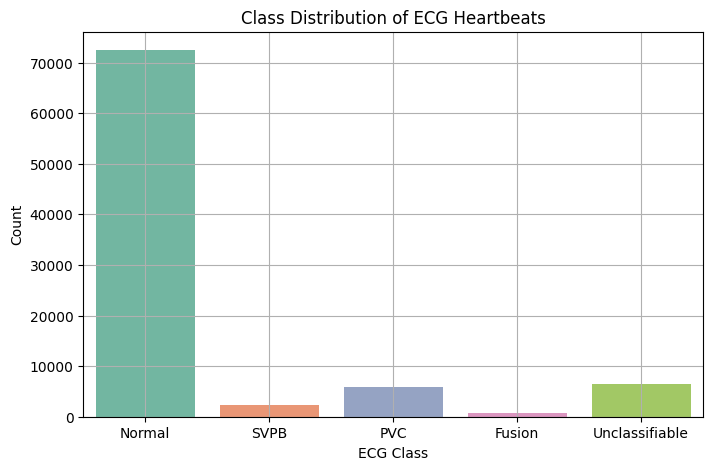

In [ ]:
label_counts = df[187].value_counts().sort_index()
labels = ['Normal', 'SVPB', 'PVC', 'Fusion', 'Unclassifiable']

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=label_counts.values, palette='Set2')
plt.title("Class Distribution of ECG Heartbeats")
plt.ylabel("Count")
plt.xlabel("ECG Class")
plt.grid(True)
plt.show()



Step 6 : Plot Random ECG Signals by Class

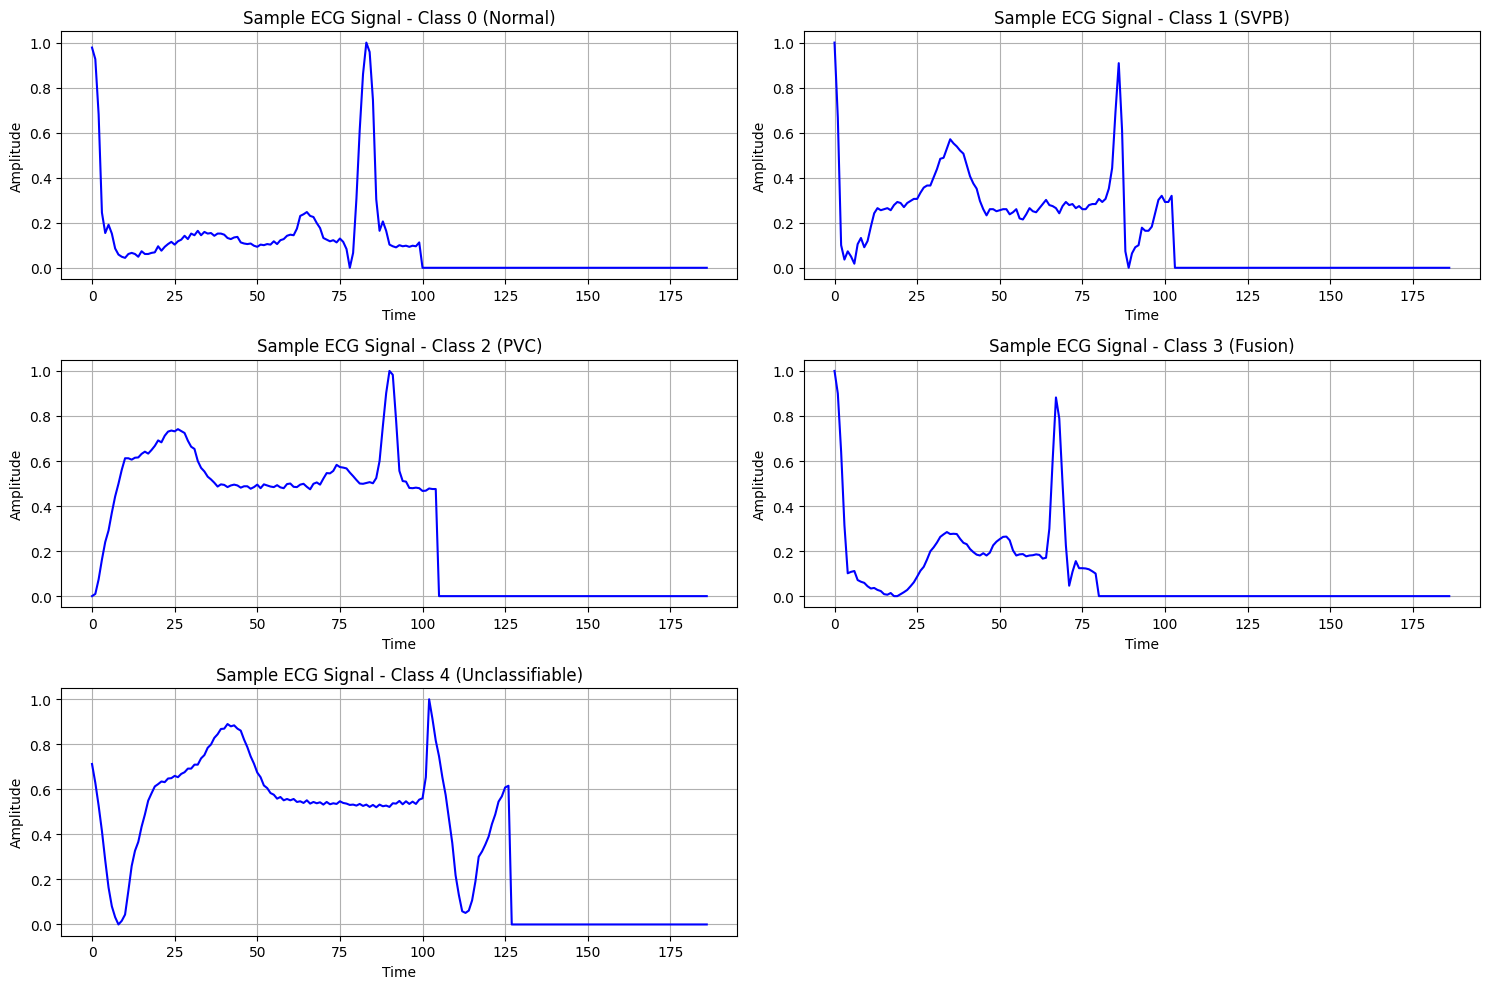

In [ ]:
plt.figure(figsize=(15,10))

for i in range(5):
    sample = df[df[187] == i].iloc[0, :187].values
    plt.subplot(3, 2, i+1)
    plt.plot(sample, color='b')
    plt.title(f"Sample ECG Signal - Class {i} ({labels[i]})")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()


Step 7: Mean ECG Waveform by Class

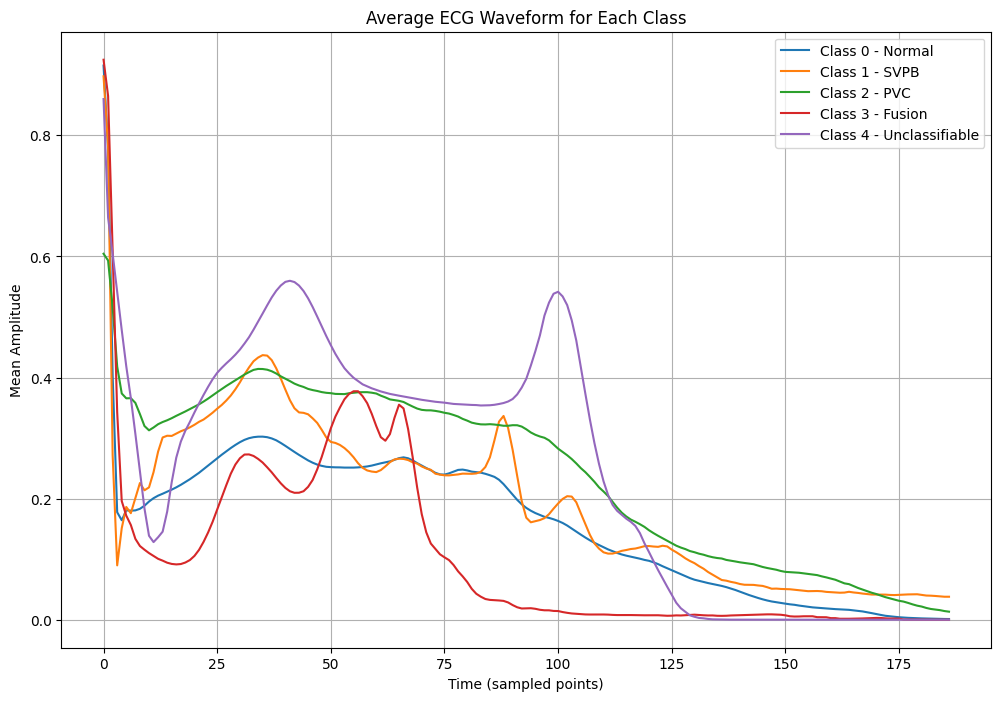

In [ ]:
plt.figure(figsize=(12,8))

for i in range(5):
    class_data = df[df[187] == i].iloc[:, :187]
    mean_wave = class_data.mean(axis=0)
    plt.plot(mean_wave, label=f'Class {i} - {labels[i]}')

plt.title("Average ECG Waveform for Each Class")
plt.xlabel("Time (sampled points)")
plt.ylabel("Mean Amplitude")
plt.legend()
plt.grid(True)
plt.show()


Step 8 : Check Missing Values or Outliers

In [ ]:
print("Missing values in dataset:", df.isnull().sum().sum())


Missing values in dataset: 0


Step 9: ECG Signal Variability (Standard Deviation) by Class

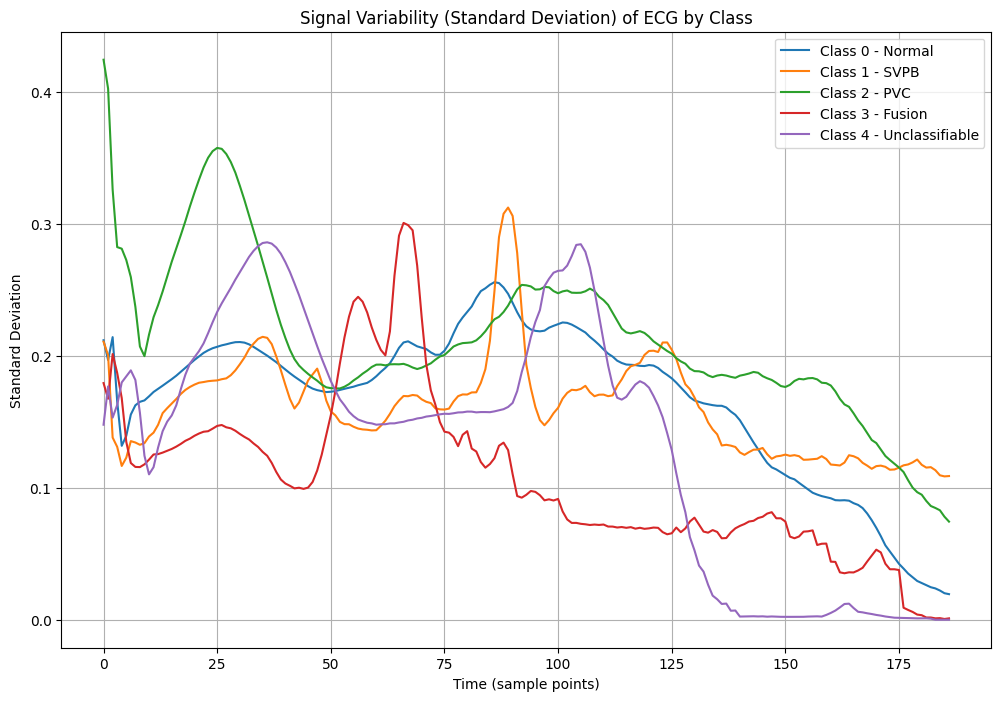

In [15]:
plt.figure(figsize=(12,8))

for i in range(5):
    class_data = df[df[187] == i].iloc[:, :187]
    std_wave = class_data.std(axis=0)
    plt.plot(std_wave, label=f'Class {i} - {labels[i]}')

plt.title("Signal Variability (Standard Deviation) of ECG by Class")
plt.xlabel("Time (sample points)")
plt.ylabel("Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()


Step 10 : ECG Heatmap for One Class (Intensity Over Time)

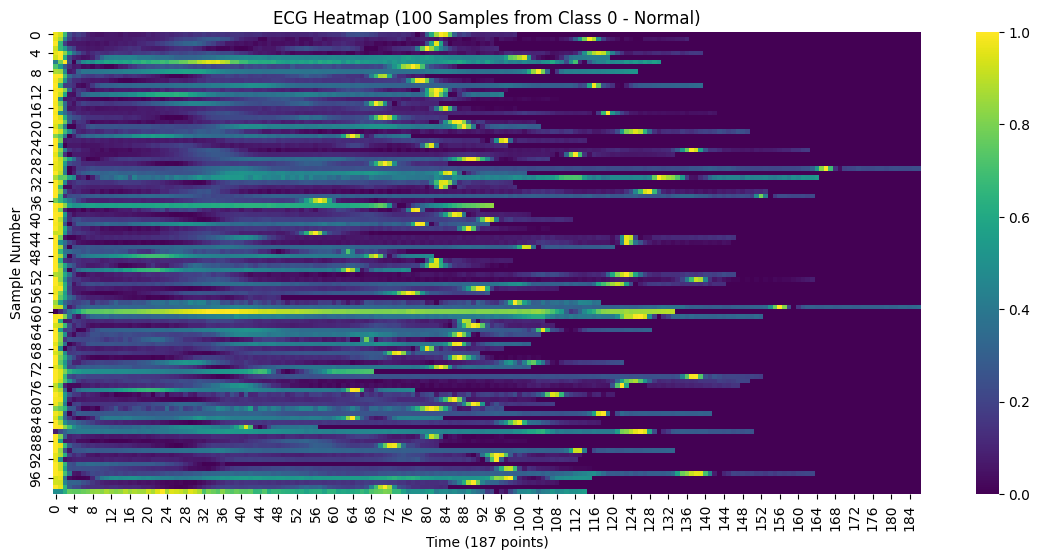

In [16]:
import seaborn as sns

# Select 100 signals from Class 0
subset = df[df[187] == 0].iloc[:100, :187]

plt.figure(figsize=(14, 6))
sns.heatmap(subset, cmap="viridis", cbar=True)
plt.title("ECG Heatmap (100 Samples from Class 0 - Normal)")
plt.xlabel("Time (187 points)")
plt.ylabel("Sample Number")
plt.show()


Step 11 : Boxplot of ECG Values (Per Class)

<ipython-input-17-15de39304c31>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='mean_amp', data=sampled_df, palette="Set3")


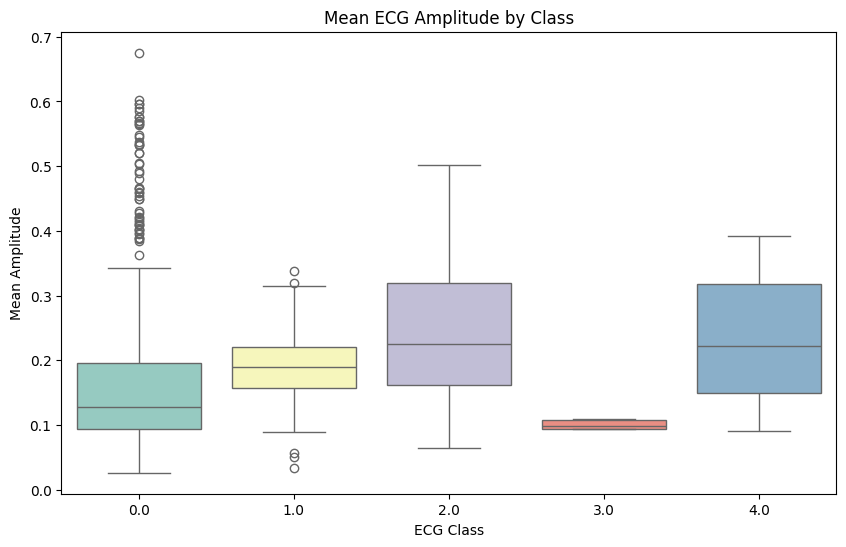

In [17]:
# Reduce data for plotting
sampled_df = df.sample(1000, random_state=42)
sampled_df['label'] = sampled_df[187]

# Take mean of each signal and compare across classes
sampled_df['mean_amp'] = sampled_df.iloc[:, :187].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean_amp', data=sampled_df, palette="Set3")
plt.title("Mean ECG Amplitude by Class")
plt.xlabel("ECG Class")
plt.ylabel("Mean Amplitude")
plt.show()


Step 12: t-SNE Projection for Signal Clustering (Advanced Bonus)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


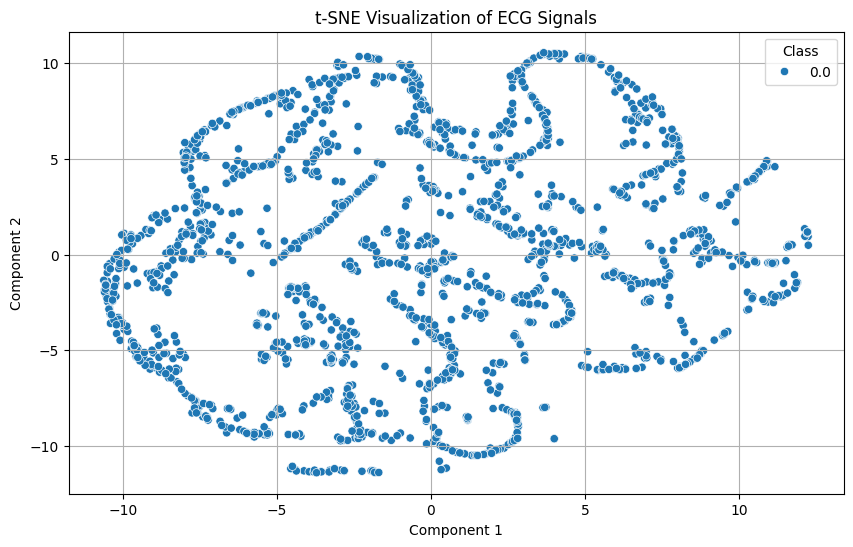

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :187]
y = df[187]

# Standardize for better t-SNE performance
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled[:2000])  # Use a subset

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y[:2000], palette='tab10')
plt.title("t-SNE Visualization of ECG Signals")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.show()


## Bonus Insights & Visualizations:
- Class-specific standard deviation shows how consistent signal shapes are.
- Heatmaps reveal detailed waveform activity for entire classes.
- Boxplots compare signal strengths across different heartbeat types.
- t-SNE visually proves that ECG signals can be grouped by class even without ML.

These visualizations enhance the understanding of signal structure, variability, and class separability — all crucial for healthcare signal analysis.


## Conclusion:
- The dataset contains over 87,000 ECG signals from 5 heartbeat classes.
- Class imbalance is visible, with 'Normal' beats dominating.
- ECG signals follow a clear temporal waveform pattern.
- Average signal shapes vary significantly by class, especially PVC and SVPB.
- No missing values detected.

📌 This analysis gives a strong structural understanding of the ECG signal data, suitable for downstream classification tasks or anomaly detection.
